In [61]:
!python --version

Python 3.10.12


# Getting the Data

In [62]:
import pandas as pd # import Pandas for data manipulation
import numpy as np # import Numpy for mathematical operations
import matplotlib.pyplot as plt # import Numpy for data visualization
import math

In [63]:
# Kaggle Link
# https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [64]:
src = pd.read_csv('winequality-red.csv')
src.shape # Getting the number of rows and columns

(1599, 12)

In [65]:
src.info() # In order to see whether some values are missing from any of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [66]:
src.describe()
# Getting familiar with the type of data we are working
# Checking mean values in order to decide if we need to scale and transform some of the features to extract useful patterns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


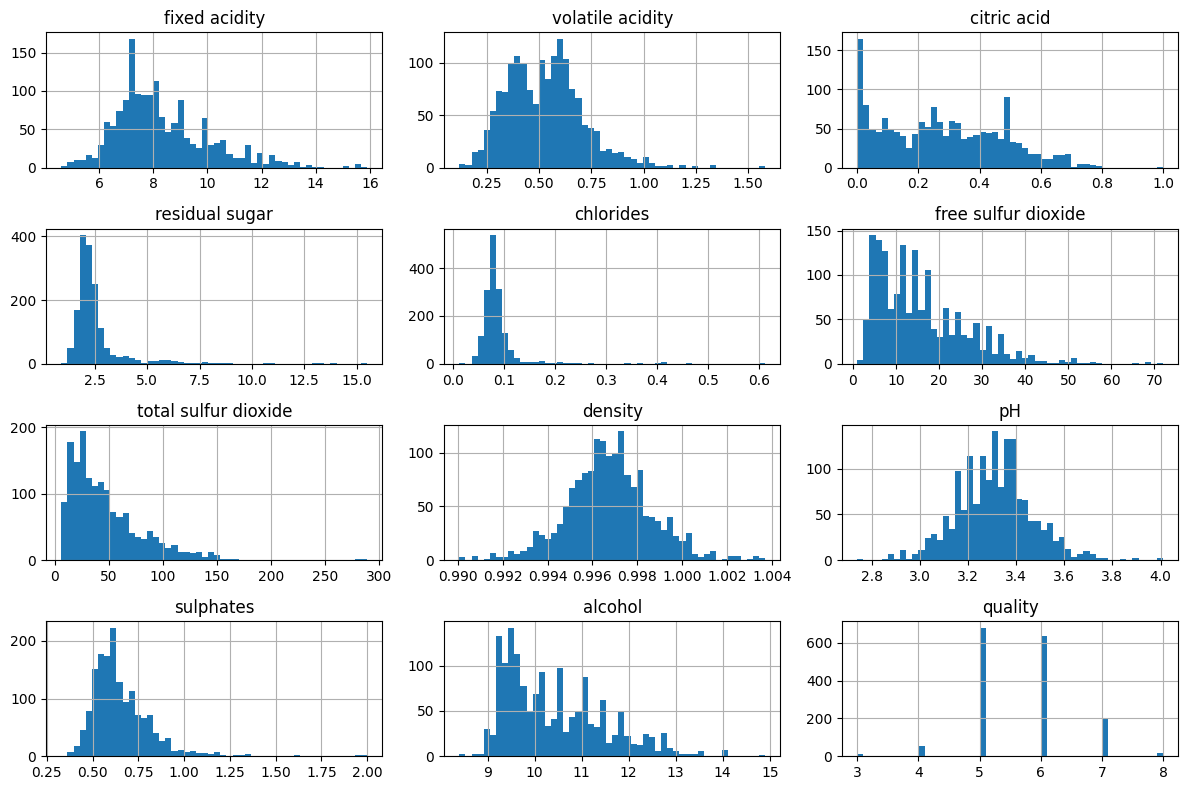

In [67]:
src.hist(bins=50, figsize=(12,8))
plt.tight_layout()
plt.show()
# Visualizing values of each feature to see the value distribution

1) As we can see from the histograms for each feature, features such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, alcohol are skewed to the right, so have to transform it using logarithms.


2) Features such as citric acid, chlorides features are ranged between 0 and 1, so we do not have to transform them


3) On top of that large number of wines are rated either 5 or 6, thus small percentage of wines represent other ratings such as 4, 7, 8 and etc. It is also noticeable that most of the wines have bad quality.


4) We might have to use stratified data in order to give a model representative features that it can learn from. For wine quality, we can divide the numbers into categories. For instance, from 1 to 4  - Awful wine, from 5 to 6 - Moderate wine, from 7-10 - Great wine.  


# Exploring and Visualizing Data

In [68]:
# Creating wine quality category feature
src['quality_cat'] = pd.cut(src['quality'],bins=[0.,5., 7.,np.inf], labels=[1,2,3])

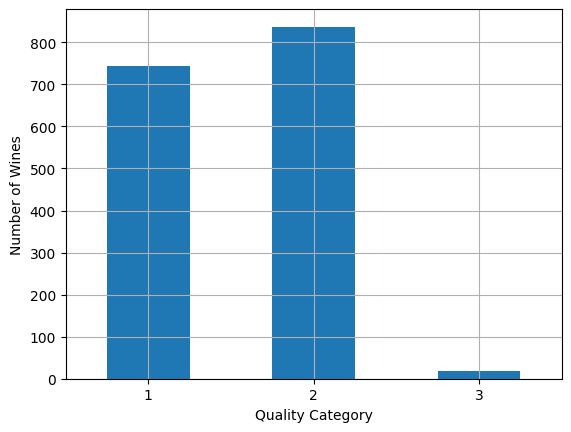

In [69]:
# Visualizing number of values for each category
src['quality_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel('Quality Category')
plt.ylabel('Number of Wines')
plt.show()

## n.1 Creating Test Set

In [70]:
from sklearn.model_selection import train_test_split # importing specific function in order to split data using stratification method

strat_train_set, strat_test_set = train_test_split(src, test_size=0.2, stratify=src["quality_cat"], random_state=42) # Test size for this dataset is 20%
strat_test_set['quality_cat'].value_counts()/len(strat_test_set) # Proportion of each category in the dataset

,count
quality_cat,
2,0.521875
1,0.465625
3,0.012500


In [71]:
# Dropping 'quality_cat' feature as we no longer need it and to save computational power
for set_ in (strat_train_set, strat_test_set):
  set_.drop('quality_cat', axis=1, inplace=True)

src = strat_train_set.copy() #Copying training set to conduct operations on src and return to strat_train_set before training the model

## n.2 Visualizing the Data

In [72]:
# Creating correlation matrix in order to look for correlations betweens features
corr_matrix = src.corr()
corr_matrix['quality'].sort_values(ascending=False)

,quality
quality,1.000000
alcohol,0.485302
sulphates,0.259088
citric acid,0.230819
fixed acidity,0.113377
residual sugar,0.013174
free sulfur dioxide,-0.054857
pH,-0.068793
chlorides,-0.119345
total sulfur dioxide,-0.181312


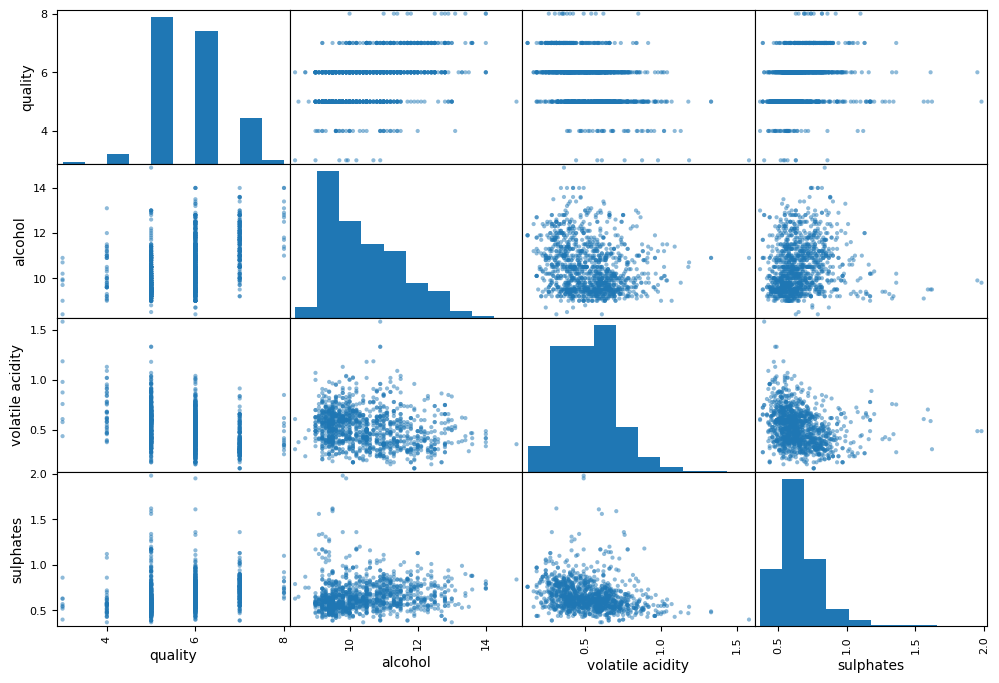

In [73]:
from pandas.plotting import scatter_matrix

attr = ['quality', 'alcohol', 'volatile acidity', 'sulphates']
scatter_matrix(src[attr], figsize=(12,8))
plt.show()

It is an interesting situation, where values of feature 'quality' are limiting the opportunity to extract useful features, however there is a pretty strong correlation as we can see thanks to dense lines across each correlation with 'quality' feature.  

In [74]:
# Experimenting with attribute combinations
src['acidity_ratio'] = src['fixed acidity'] / src['volatile acidity']
src['sulfur_ratio'] = src['free sulfur dioxide'] / src['total sulfur dioxide']

corr_matrix = src.corr()
corr_matrix['quality'].sort_values(ascending=False)

,quality
quality,1.000000
alcohol,0.485302
acidity_ratio,0.348214
sulphates,0.259088
citric acid,0.230819
sulfur_ratio,0.201431
fixed acidity,0.113377
residual sugar,0.013174
free sulfur dioxide,-0.054857
pH,-0.068793


We actually managed to create combination of free sulfur dioxide and total sulfur dioxide which is slightly more representative.

## n.3 Preparing data for ML model

In [75]:
src = strat_train_set.drop('quality', axis=1)
src_labels = strat_train_set['quality'].copy()

In [76]:
# There are no missing values, so we can skip the cleaning part
# There are no text and categorical attributes, so we can skip this part

from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(src[['alcohol', 'volatile acidity', 'sulphates']], src_labels)

some_data = src[['alcohol', 'volatile acidity', 'sulphates']].iloc[:5]

predictions = model.predict(some_data)

mse = mean_squared_error(src_labels.iloc[:5], predictions)
mae = mean_absolute_error(src_labels.iloc[:5], predictions)

for i in range(0,5):
  print(f'{i}) Prediction: {round(predictions[i],2)}, Actual value: {src_labels.iloc[i]}')

print("\nMSE:", mse)
print("RMSE:", math.sqrt(mse))
print("MAE:", mae)

0) Prediction: 6.37, Actual value: 7
1) Prediction: 5.42, Actual value: 5
2) Prediction: 5.2, Actual value: 6
3) Prediction: 5.19, Actual value: 3
4) Prediction: 6.04, Actual value: 6

MSE: 1.1983071806129657
RMSE: 1.0946721795190402
MAE: 0.8143560539933471


The results are satisfactory, but not great. We will have to try other ways of transforming data, changing models and fine-tuning.

In [77]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

def log_transform(X):
    X[X <= 0] = 1e-6
    return np.log(X)

log_pipeline = make_pipeline(
    FunctionTransformer(log_transform, feature_names_out="one-to-one"),
    StandardScaler())
default_num_pipeline = make_pipeline(StandardScaler())

default_num_pipeline = make_pipeline(StandardScaler()) # Standard procedure for default features

preprocessing = ColumnTransformer([
    ('log', log_pipeline, ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'sulphates', 'alcohol', 'free sulfur dioxide', 'total sulfur dioxide'])
    ],
    remainder=default_num_pipeline)

In [78]:
# src_prepared = preprocessing.fit_transform(src)
# src_prepared.shape

In [79]:
# preprocessing.get_feature_names_out()

# Selecting, Training and Evaluating a Model

## n.1 Support Vector Machine

In [80]:
from sklearn.svm import SVR

svm = make_pipeline(preprocessing, SVR())
svm.fit(src, src_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function log_transform at 0x7cd3254ad2d0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['fixed acidity',
                                                   'volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides', 'sulphates',
                                                   'alcohol',
                                                   'free sulfur dioxide',
                                                   'total sulfur dioxide'])])),
                ('svr', SVR())])

In [81]:
from sklearn.metrics import accuracy_score

svm_predict = svm.predict(src)

print(svm_predict[:7].round(2))
print(src_labels[:7].values)
print(f'\nMSE:{mean_squared_error(src_labels, svm_predict).round(2)}')
print(f'RMSE:{round(math.sqrt(mean_squared_error(src_labels, svm_predict)),2)}')
print(f'MAE:{mean_absolute_error(src_labels, svm_predict).round(2)}')
print(f'Accuracy: {accuracy_score(src_labels, svm_predict.round()).round(2)}')

[6.38 5.28 5.25 4.89 6.1  5.44 5.1 ]
[7 5 6 3 6 6 5]

MSE:0.29
RMSE:0.54
MAE:0.37
Accuracy: 0.7


The results of the support vector machine are actually very good.

However, we cannot be sure that it will show good generalization on previosly unseen data.

In [82]:
from sklearn.model_selection import cross_val_score

svm_rmses = -cross_val_score(svm, src, src_labels, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(svm_rmses).describe()

,0
count,10.000000
mean,0.633812
std,0.042949
min,0.552515
25%,0.621644
50%,0.647732
75%,0.658075
max,0.694387


By using cross validation score method, we found out that actually MSE of SVM is 0.63, which is still better that linear regression model, but not so impressive compared to 0.29 MSE score it showed previously.

## n.2 Fine-tuning Model with various hyperparameters

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('svm', SVR())
])

param_grid = [
    {'svm__C': [0.5, 1, 5],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
    }
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(src, src_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('log',
                                                                         Pipeline(steps=[('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<function log_transform at 0x7cd3254ad2d0>)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'acidity',
                                                                          'citric '
                                                                          'acid',
                                                                          'residual '
                                                                          'sugar',
                                                                          'chlorides',
                                                                          'sulphates',
                                                                          'alcohol',
                                                                          'free '
                                                                          'sulfur '
                                                                          'dioxide',
                                                                          'total '
                                                                          'sulfur '
                                                                          'dioxide'])])),
                                       ('svm', SVR())]),
             param_grid=[{'svm__C': [0.5, 1, 5],
                          'svm__gamma': ['scale', 'auto'],
                          'svm__kernel': ['linear', 'rbf']}],
             scoring='neg_root_mean_squared_error')

In [84]:
grid_search.best_params_

{'svm__C': 0.5, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}

In [85]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[['params', 'mean_test_score', 'std_test_score']]
cv_res['mean_test_score'] = -cv_res['mean_test_score']
cv_res

<ipython-input-85-220c590dfd8c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_res['mean_test_score'] = -cv_res['mean_test_score']


,params,mean_test_score,std_test_score
1,"{'svm__C': 0.5, 'svm__gamma': 'scale', 'svm__k...",0.637631,0.013708
3,"{'svm__C': 0.5, 'svm__gamma': 'auto', 'svm__ke...",0.637631,0.013708
5,"{'svm__C': 1, 'svm__gamma': 'scale', 'svm__ker...",0.641670,0.020199
7,"{'svm__C': 1, 'svm__gamma': 'auto', 'svm__kern...",0.641670,0.020199
0,"{'svm__C': 0.5, 'svm__gamma': 'scale', 'svm__k...",0.653601,0.000636
2,"{'svm__C': 0.5, 'svm__gamma': 'auto', 'svm__ke...",0.653601,0.000636
8,"{'svm__C': 5, 'svm__gamma': 'scale', 'svm__ker...",0.653663,0.000611
10,"{'svm__C': 5, 'svm__gamma': 'auto', 'svm__kern...",0.653663,0.000611
4,"{'svm__C': 1, 'svm__gamma': 'scale', 'svm__ker...",0.653686,0.000651
6,"{'svm__C': 1, 'svm__gamma': 'auto', 'svm__kern...",0.653686,0.000651


SVM model with such hyperparameters ('C': 0.5, 'gamma': 'scale', 'kernel': 'rbf') were chosen to be the best among other combinations, thanks to its low Root Mean Squared Error.

We have just used GridSearchCV method, which is great, but requires a lot of computational power. Now, we should try using RandomizedSearchCV in order to find out, whether we can find the same or better model by using less resources (time, computational power).

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_distribs = {
    'svm__C': uniform(loc=0.1, scale=9.9),
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

rnd_search = RandomizedSearchCV(
    full_pipeline,
    param_distribs,
    n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(src, src_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('log',
                                                                               Pipeline(steps=[('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                    func=<function log_transform at 0x7cd3254ad2d0>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['fix...
                                                                                'acid',
                                                                                'residual '
                                                                                'sugar',
                                                                                'chlorides',
                                                                                'sulphates',
                                                                                'alcohol',
                                                                                'free '
                                                                                'sulfur '
                                                                                'dioxide',
                                                                                'total '
                                                                                'sulfur '
                                                                                'dioxide'])])),
                                             ('svm', SVR())]),
                   param_distributions={'svm__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cd327d85120>,
                                        'svm__gamma': ['scale', 'auto'],
                                        'svm__kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [87]:
rnd_search.best_params_

{'svm__C': 0.3037864935284442, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}

In [88]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[['params', 'mean_test_score', 'std_test_score']]
cv_res['mean_test_score'] = -cv_res['mean_test_score']
cv_res

,params,mean_test_score,std_test_score
5,"{'svm__C': 0.3037864935284442, 'svm__gamma': '...",0.639394,0.011393
9,"{'svm__C': 4.376255684556946, 'svm__gamma': 's...",0.653643,0.000635
4,"{'svm__C': 6.051038616257767, 'svm__gamma': 'a...",0.653649,0.000620
1,"{'svm__C': 7.34674002393291, 'svm__gamma': 'sc...",0.653652,0.000624
8,"{'svm__C': 3.1119982052994235, 'svm__gamma': '...",0.653660,0.000613
0,"{'svm__C': 3.807947176588889, 'svm__gamma': 's...",0.653664,0.000609
3,"{'svm__C': 0.6750277604651747, 'svm__gamma': '...",0.653665,0.000632
2,"{'svm__C': 1.6445845403801216, 'svm__gamma': '...",0.653667,0.000647
7,"{'svm__C': 1.9000671753502962, 'svm__gamma': '...",0.653675,0.000620
6,"{'svm__C': 8.341182143924176, 'svm__gamma': 'a...",0.699506,0.038302


Interesting thing to note, RandomizedSearchCV method was able to almost achieve the same RMSE as GridSearchCV, however its hyperparameters were quite dissimilar. We will stick to using hyperparameters found by GridSearch CV.

In [89]:
best_model = grid_search.best_estimator_ # Extracting and saving the best model in new variable

In [90]:
X_test = strat_test_set.drop('quality', axis=1)
y_test = strat_test_set['quality'].copy()

In [91]:
from sklearn.metrics import r2_score

final_predictions = best_model.predict(X_test)
rmse = math.sqrt(mean_squared_error(y_test, final_predictions))
mae = mean_absolute_error(y_test, final_predictions)
r2 = r2_score(y_test, final_predictions)
acc = accuracy_score(y_test, final_predictions.round())

print(f'RMSE: {round(rmse, 2)}')
print(f'MAE: {round(mae, 2)}')
print(f'R2: {round(r2, 2)}')

RMSE: 0.63
MAE: 0.46
R2: 0.36


SVM with best hyperparameters is showing decent results in metrics such as RMSE and MAE.

However, it is worth considering other types of Machine Learning Models in order to achieve maximum results for this task of predicting wine quality.

# Experimenting

## n.1 Implement 'SelectFromModel' transformer in full pipeline

In [92]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer

# Useful function for logarithmic transformation
def log_transform(X):
    X[X <= 0] = 1e-6
    return np.log(X)

# Pipeline for logarithm
log_pipeline = make_pipeline(
    FunctionTransformer(log_transform, feature_names_out="one-to-one"),
    StandardScaler()
)

# Pipeline for other features
default_num_pipeline = make_pipeline(StandardScaler())

# ColumnTransformer to apply pipelines
preprocessing = ColumnTransformer([
    ('log', log_pipeline, ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'sulphates', 'alcohol', 'free sulfur dioxide', 'total sulfur dioxide'])
], remainder=default_num_pipeline)

# Creating Random Forest to find useful features
rfs = RandomForestRegressor(max_depth=2, random_state=42)
rfs.fit(preprocessing.fit_transform(src), src_labels)

# Using SelectFromModel Transformer
useful_features = SelectFromModel(rfs, prefit=True)

# Final Pipeline
final_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('feature_selection', useful_features)
])

# Transformed training set
src_transformed = final_pipeline.fit_transform(src, src_labels)

# Transformed test set
X_test_transformed = final_pipeline.transform(X_test)

# Creating one more Random Forest to train and test on transformed datasets
rf = RandomForestRegressor(max_depth=2, random_state=42)
rf.fit(src_transformed, src_labels)

# Predictions
pred = rf.predict(X_test_transformed)

# Metrics
print(f'RMSE: {round(math.sqrt(mean_squared_error(y_test, pred)), 2)}')
print(f'MAE: {round(mean_absolute_error(y_test, pred), 2)}')
print(f'R2: {round(r2_score(y_test, pred), 2)}')


RMSE: 0.68
MAE: 0.53
R2: 0.26


## n.2 Implementing StandardScalerClone from scratch

In [93]:
import pandas as pd , numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StdScalerClone(BaseEstimator, TransformerMixin):
  def __init__(self, with_mean=True):
    self.with_mean = with_mean

  def fit(self, X, y=None):
    if isinstance(X, pd.DataFrame):
      self.feature_names_in_ = np.array(X.columns)
    X = check_array(X)
    self.mean_ = X.mean(axis=0)
    self.scale_ = X.std(axis=0)
    self.scale_[self.scale_ == 0] = 1e-8
    self.n_features_in_ = X.shape[1]
    return self

  def transform(self, X):
    check_is_fitted(self)
    X = check_array(X)
    assert self.n_features_in_ == X.shape[1]
    if self.with_mean:
      X = X - self.mean_
    return X / self.scale_

  def inverse_transform(self, X):
    X = check_array(X)
    assert self.n_features_in_ == X.shape[1]
    X = X * self.scale_
    if self.with_mean:
      X = X + self.mean_
    return X

  def get_feature_names_out(self, input_features=None):
    if input_features is None:
      if hasattr(self, 'feature_names_in_'):
        return self.feature_names_in_
      else:
        return np.array([f'x{i}' for i in range(self.n_features_in_)])
    else:
      if len(input_features) == self.n_features_in_:
        return input_features
      else:
        raise ValueError(f'Input must have {self.n_features_in_} elements!')

X = pd.DataFrame({
    'Height': [170, 180, 160, 175, 165],
    'Weight': [70, 80, 60, 75, 65],
    'Age': [30, 25, 35, 40, 22]
})

scaler = StdScalerClone()
scaler.fit(X)
# print("Feature names:", scaler.feature_names_in_)
# print(scaler.get_feature_names_out())

X_scaled = scaler.transform(X)
inversed = scaler.inverse_transform(X_scaled)
print(f'{X_scaled}\n{inversed}')

[[ 0.          0.         -0.06125639]
 [ 1.41421356  1.41421356 -0.82696125]
 [-1.41421356 -1.41421356  0.70444848]
 [ 0.70710678  0.70710678  1.47015334]
 [-0.70710678 -0.70710678 -1.28638417]]
[[170.  70.  30.]
 [180.  80.  25.]
 [160.  60.  35.]
 [175.  75.  40.]
 [165.  65.  22.]]
